# Tutorial

In [23]:
# import all packages you will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.signal
import datetime
import glob
import math
import sys

In [24]:
import sys, os
# Get the current script’s directory
current_directory = os.getcwd()
# Go back one folder level
parent_directory = os.path.abspath(os.path.join(current_directory, os.pardir))
sys.path.insert(0, parent_directory)
from mtsthelens import preprocessing_functions, manipulation_functions, plotting_functions

## Read & preprocess data

In [25]:
# Read input data
df =  preprocessing_functions.read_data('../example/example_data/example_data_eruption.csv')

# Data smoothing
df = df.rolling('6H', center=True).median()

# Remove outliers
df = df.apply(preprocessing_functions.mask_df,axis=0) # peak detection

## Data manipulation

### Stack in Time

In [26]:
# Find the seasonal trends in the data, and create a new dataframe with the seasonality removed
df_seasonal_trends, df_seasonality_removed = manipulation_functions.stackInTime(df)

# Save those dataframes as output csv files
# manipulation_functions.export_csv('example_data_eruption_stacktime', df_seasonal_trends)
# manipulation_functions.export_csv('example_data_eruption_seasonality_removed', df_seasonality_removed)

### Stack in Space

In [27]:
# Find the differences between the stations, and the average 
df_median_stackSpace, df_stackSpace_year = manipulation_functions.stackInSpace(df)
df_yearlyParam = manipulation_functions.stackSpace_yearParam(df_stackSpace_year)

# Save those dataframes as output csv files
# manipulation_functions.export_csv('example_data_eruption_stackspaceYear',df_stackSpace_year)
# manipulation_functions.export_csv('example_data_eruption_stackspaceParam',df_yearlyParam)

### Apply Filter

                              HSR           STD
time                                           
2004-01-01 00:00:00  9.881413e-17  6.064429e-17
2004-01-01 00:10:00  1.283450e-15  7.877901e-16
2004-01-01 00:20:00  8.383064e-15  5.146874e-15
2004-01-01 00:30:00  3.713697e-14  2.280923e-14
2004-01-01 00:40:00  1.268073e-13  7.792185e-14
...                           ...           ...
2005-12-31 23:10:00  1.308695e+00  1.017758e+00
2005-12-31 23:20:00  1.308894e+00  1.019626e+00
2005-12-31 23:30:00  1.309094e+00  1.021500e+00
2005-12-31 23:40:00  1.309295e+00  1.023378e+00
2005-12-31 23:50:00  1.309497e+00  1.025260e+00

[105264 rows x 2 columns]


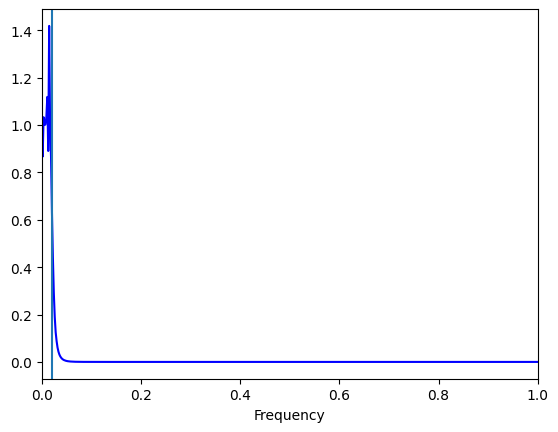

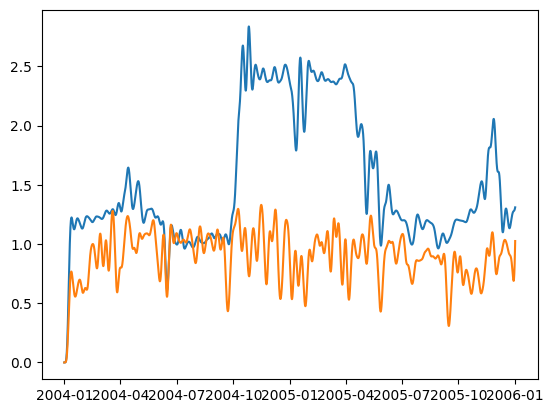

In [28]:
df = df.fillna(0)
df_filter = manipulation_functions.filter_data(df)
# manipulation_functions.export_csv('example_data_eruption_filter',df_filter)
print(df_filter)
plt.figure()
plt.plot(df_filter)

## Data plotting

In [7]:
# read extrusion rate data
df_dome = pd.read_csv('../example/example_data/dome_extrusion.txt', header=0, skiprows=0)
df_dome.set_index('Date of photography',inplace=True)
df_dome.index = pd.to_datetime(df_dome.index).tz_localize(None)
df_dome['diff'] = df_dome['Total volume change(x 106 m3)']-df_dome['Total volume change(x 106 m3)'].shift(1)
df_dome.head()

,Total volume change(x 106 m3),Total volume change rate (m3/s),Extruded lava volume (x 106 m3),Lava extrusion rate (m3/s),diff
Date of photography,,,,,
2004-09-23,0,NaN,NaN,NaN,NaN
2004-10-04,5,NaN,NaN,NaN,5.0
2004-10-11,10,8.9,NaN,NaN,5.0
2004-10-13,11,6.4,0.54,NaN,1.0
2004-11-04,20,4.6,12.00,5.9,9.0


<Axes: xlabel='Date of photography'>

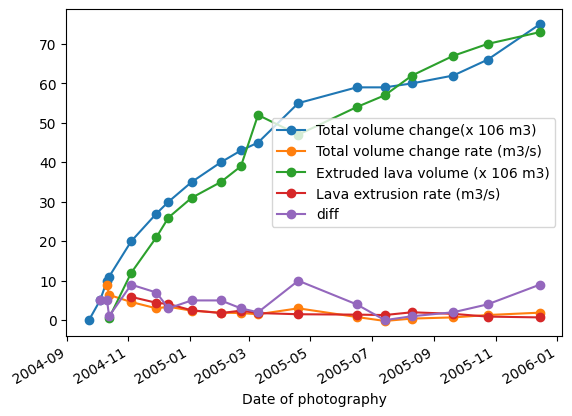

In [8]:
df_dome.plot(marker='o')

In [18]:
# load station coordinates and drop the stations which are not of interresst
sta_list =['BLIS', 'CDF', 'EDM', 'ELK', 'FL2', 'HOA', 'HSR', 'JRO', 'JUN', # specify the stations you want to use
           'LOO', 'MIDE', 'NED', 'RAFT', 'REM', 'SEP', 'SHW', 'SOS', 'SPN5',
           'STD', 'SUG', 'SWFL', 'TDL', 'USFR', 'VALT', 'YEL'] 

df_sta = pd.read_csv('./example_data/sta_log_long.txt', sep='|', header=0) # coordinates
df = df_sta[~df_sta['Station'].isin(list(set(df_sta.Station)-set(sta_list)))] # delete Stations which are not of interresst
df_sta = df_sta.drop_duplicates(subset=['Station']) # drop one station if the station is not unique
df_sta = df_sta.reset_index(drop=True)
df_sta.head()

,Network,Station,latitude,longitude,Elevation,Sitename,StartTime,EndTime
0,CC,AHAB,46.194790,-122.187027,2298.0,Ahab the whale(back) rider MSH,2005-02-08T00:00:00,2005-02-17T00:00:00
1,CC,BLIS,46.197472,-122.186569,2116.0,"Blister, Mt. St. Helens (Dome sta)",2004-10-12T00:00:00,2005-02-17T00:00:00
2,CC,GUAC,46.219200,-122.192330,1618.3,"Guacamole, crater of Mount St. Helens",2018-11-19T00:00:00,2599-12-31T23:59:59
3,CC,HOA,46.241780,-122.191830,1151.0,Hoala,2021-06-08T00:00:00,2599-12-31T23:59:59
4,CC,JRO,46.275270,-122.218260,1219.0,Johnston Ridge Observatory,2004-10-02T00:00:00,2599-12-31T23:59:59


In [19]:
# get the distance between the stations and sort them in increasing order (relative to station SEP -> crater center)
ref_sta = 'SEP' # define the reference station, we will get distance from all other stations to this station
df_sta['dist'] = df_sta.apply(lambda x: preprocessing_functions.calculate_distance(x['latitude'],df_sta.latitude[df_sta['Station']==ref_sta] , x['longitude'],df_sta.longitude[df_sta['Station']==ref_sta] ), axis=1)
df_sta = df_sta.sort_values(by=['dist'])
sta_sorted = df_sta['Station'].to_list()
df_sta.head()

/Users/koepflma/Desktop/CSE583/project/CSE583_MtStHelens/mtsthelens/preprocessing_functions.py:30: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lon2 = math.radians(lon2)
/Users/koepflma/Desktop/CSE583/project/CSE583_MtStHelens/mtsthelens/preprocessing_functions.py:32: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lat2 = math.radians(lat2)


,Network,Station,latitude,longitude,Elevation,Sitename,StartTime,EndTime,dist
15,CC,SEP,46.199780,-122.190857,2114.0,"September lobe, Mt. St. Helens (Dome sta)",2004-11-05T00:00:00,2599-12-31T23:59:59,0.000000
35,UW,DIO,46.200668,-122.190369,2102.0,"Mt. St Helens, Dome",1986-08-01T00:00:00,1986-10-31T23:59:59,0.105643
46,UW,NSP,46.200939,-122.188148,2062.0,"New Spider, Mt. St. Helens",1985-10-01T00:00:00,1986-08-31T23:59:59,0.245106
8,CC,MIDE,46.197750,-122.187439,2132.0,Near old BLIS MSH,2005-02-16T00:00:00,2005-07-26T00:00:00,0.346634
7,CC,MIBL,46.197319,-122.186913,2132.0,St Helens between BLIS and MIDE,2005-11-18T00:00:00,2007-12-31T00:00:00,0.408689


### Bring data into used shape

In [9]:
df.head(), df_seasonality_removed.head(), df_filter.head()

(                          HSR       STD
 time                                   
 2004-01-01 00:00:00  1.180261  0.724351
 2004-01-01 00:10:00  1.185823  0.729078
 2004-01-01 00:20:00  1.188123  0.737474
 2004-01-01 00:30:00  1.190423  0.745870
 2004-01-01 00:40:00  1.214803  0.749927,
                           HSR       STD
 time                                   
 2004-01-01 00:00:00 -0.456950  0.006014
 2004-01-01 00:10:00 -0.453864  0.008377
 2004-01-01 00:20:00 -0.452714  0.012576
 2004-01-01 00:30:00 -0.451564  0.016774
 2004-01-01 00:40:00 -0.438844  0.018802,
                               HSR           STD
 time                                           
 2004-01-01 00:00:00  9.881413e-17  6.064429e-17
 2004-01-01 00:10:00  1.283450e-15  7.877901e-16
 2004-01-01 00:20:00  8.383064e-15  5.146874e-15
 2004-01-01 00:30:00  3.713697e-14  2.280923e-14
 2004-01-01 00:40:00  1.268073e-13  7.792185e-14)

In [41]:
df


,HSR,STD
time,,
2004-01-01 00:00:00,1.180261,0.724351
2004-01-01 00:10:00,1.185823,0.729078
2004-01-01 00:20:00,1.188123,0.737474
2004-01-01 00:30:00,1.190423,0.745870
2004-01-01 00:40:00,1.214803,0.749927
...,...,...
2005-12-31 23:10:00,1.333559,2.603774
2005-12-31 23:20:00,1.326346,2.596629
2005-12-31 23:30:00,1.319133,2.603774


In [40]:
df_stat = manipulation_functions.stackSpace_yearParam(df) # extract statistical values

# append latitude and longitude of the station as rows for plotting
df_stat.loc['latitude'] = [df_sta.loc[df_sta['Station'] == sta, 'latitude'].values[0] for sta in df_stat.columns]
df_stat.loc['longitude'] = [df_sta.loc[df_sta['Station'] == sta, 'longitude'].values[0] for sta in df_stat.columns]
df_stat

,HSR,STD
max,4.194300,2.653408
min,0.000000,0.000000
mean,1.602863,0.940644
median,1.434485,0.982921
latitude,46.174280,46.237490
longitude,-122.180650,-122.224210


In [42]:
# Create a dictionary with Date as key for, DataFrames
dict_test = manipulation_functions.df2dict(df, 'year')
dict_stat = {}
for key, value in dict_test.items():
    df_stat = manipulation_functions.stackSpace_yearParam(value) # extract statistical values

    # append latitude and longitude of the station as rows for plotting
    df_stat.loc['latitude'] = [df_sta.loc[df_sta['Station'] == sta, 'latitude'].values[0] for sta in df_stat.columns]
    df_stat.loc['longitude'] = [df_sta.loc[df_sta['Station'] == sta, 'longitude'].values[0] for sta in df_stat.columns]
    dict_stat[key] = df_stat

# Save the dictionary as npy
np.save('output/data/my_file.npy', dict_stat) 

### Create Plots for Animation

In [46]:
read_dictionary = np.load('output/data/my_file.npy',allow_pickle='TRUE').item()
read_dictionary

{2004:                   HSR         STD
 max          4.194300    1.871617
 min          0.000000    0.000000
 mean         1.548180    0.980650
 median       1.339965    1.052015
 latitude    46.174280   46.237490
 longitude -122.180650 -122.224210,
 2005:                   HSR         STD
 max          3.024086    2.653408
 min          0.000000    0.000000
 mean         1.657696    0.900529
 median       1.513317    0.930664
 latitude    46.174280   46.237490
 longitude -122.180650 -122.224210}

In [47]:
plotting_functions.animation(read_dictionary, 'median', 'inferno')